<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_comparativas/comparar_kmeans_aglo_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: 
Comparar k-means, agrupamiento jerárquico y GMM con los datos anisotrópicos del en el que hay diferentes tipos de blobs. 

Código para generar los datos anisotrópicos:

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
n_samples = 1500
random_state = 170
centers = [(0, 0), (5, 5),(10,10)]
X, y = make_blobs(n_samples=n_samples, centers=centers,random_state=random_state)
# Anisotropicly distributed data:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

Código para comparar clustering algorithms

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import mixture

# Generate data:
n_samples = 1500
centers = [(0, 0), (3, 3)]
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2,random_state=0)

# Kmeans clustering:
# Incorrect number of clusters
clust_kmeans = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

# Agglomerative clustering:
clust_agg = AgglomerativeClustering(n_clusters=2).fit_predict(X) 


# GMM clustering:
clust_gmm = mixture.GaussianMixture(n_components=2,covariance_type='full').fit_predict(X)

plt.figure(figsize=(14,7))

ax0 = plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], c=clust_kmeans)
plt.title("Kmeans clustering")

ax1 = plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], c=clust_gmm)
plt.title("GMM clustering")

ax2 = plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], c=clust_agg)
plt.title("Agglomerative clustering")
plt.show()

Datos mezclados y cruzados:

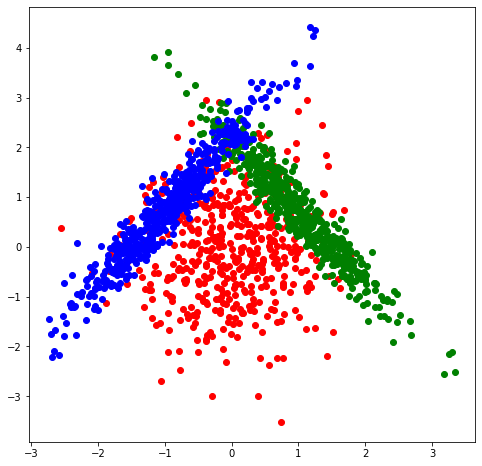

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
n_samples = 1500
random_state = 170
centers = [(0, 0), (-5, 5),(5,-5)]
X, y = make_blobs(n_samples=n_samples, centers=centers,random_state=random_state)

Xa = X[y==0]
# Anisotropicly distributed data:
transformation1 = [[0.60834549, 0.63667341], [-0.40887718, 0.85253229]]
Xa_aniso = np.dot(Xa, transformation1)

Xb = X[y==1]
# Anisotropicly distributed data:
transformation2 = [[-0.60834549, 0.70667341], [-0.40887718, 0.85253229]]
Xb_aniso = np.dot(Xb, transformation2)

Xc = X[y==2]
# Anisotropicly distributed data:
transformation3 = [[-0.60834549, -0.70667341], [-0.40887718, -0.85253229]]
Xc_aniso = np.dot(Xc, transformation3)


fig = plt.figure(figsize=(8, 8))
plt.scatter(Xa_aniso[:, 0], Xa_aniso[:, 1], c='r')
plt.scatter(Xb_aniso[:, 0], Xb_aniso[:, 1], c='g')
plt.scatter(Xc_aniso[:, 0], Xc_aniso[:, 1], c='b')
plt.show()



Acumular los datos de los tres clusters en una única matriz de datos: 

In [0]:
XT = np.append(Xa_aniso,np.append(Xb_aniso,Xc_aniso,axis=0),axis=0)

In [47]:
XT.shape

(1500, 2)